In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import plotly.graph_objects as go
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score 

from sklearn.utils import shuffle

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import eli5

In [3]:
df = pd.read_csv('EDD 2009 HHI and gravity.csv')

In [4]:
df.head(5)

,Origin,iso3_o,iso3num_o,Destination,iso3_d,iso3num_d,dist,comlang,gdp_o,gdp_d,comrel,RTA,Product Name,HHI,Share top25,MS,flows
0,Albania,ALB,8,Afghanistan,AFG,4,4342.117,0,1.204421e+07,1.248695e+07,0.204,0,30-PHARMACEUTICAL PRODUCTS,NaN,NaN,NaN,NaN
1,Albania,ALB,8,Albania,ALB,8,63.773,0,1.204421e+07,1.204421e+07,0.042,0,30-PHARMACEUTICAL PRODUCTS,NaN,NaN,NaN,NaN
2,Albania,ALB,8,Algeria,DZA,12,1533.738,0,1.204421e+07,1.372118e+08,0.203,0,30-PHARMACEUTICAL PRODUCTS,NaN,NaN,NaN,NaN
3,Albania,ALB,8,American Samoa,ASM,16,0.000,0,1.204421e+07,6.780000e+05,0.000,0,30-PHARMACEUTICAL PRODUCTS,NaN,NaN,NaN,NaN
4,Albania,ALB,8,Andorra,AND,20,1519.551,0,1.204421e+07,3.650083e+06,0.000,0,30-PHARMACEUTICAL PRODUCTS,NaN,NaN,NaN,NaN


In [137]:
df[(df['iso3_o'] == 'ALB') & (df['iso3_d'] == 'AFG')]

# MS
# o germany  d- Italy -> gertmany exporter , числитель trade flow from file "right"
# reporter = italy , parteners = world - знаменатель  
# trade flows = imports  use on the web-site 

# HHI  code 2370 
# origin 

,Origin,iso3_o,iso3num_o,Destination,iso3_d,iso3num_d,dist,comlang,gdp_o,gdp_d,comrel,RTA,Product Name,HHI,Share top25,MS,flows
0,Albania,ALB,8,Afghanistan,AFG,4,4342.117,0,1.204421e+07,1.248695e+07,0.204,0,30-PHARMACEUTICAL PRODUCTS,NaN,NaN,NaN,NaN


In [5]:
df.describe()

,iso3num_o,iso3num_d,dist,comlang,gdp_o,gdp_d,comrel,RTA,HHI,Share top25,MS,flows
count,14701.000000,14701.000000,14701.000000,14701.000000,1.470100e+04,1.470100e+04,14701.000000,14701.000000,1193.000000,843.000000,3.339000e+03,3.339000e+03
mean,449.557377,424.597510,7615.580121,0.137610,1.061091e+08,2.464859e+08,0.147673,0.111149,0.488251,0.800621,1.143520e-03,2.575130e+05
std,250.623932,249.184162,4814.815337,0.344502,2.289497e+08,1.096467e+09,0.247219,0.314327,0.286511,0.167171,1.271355e-02,1.773586e+06
min,8.000000,4.000000,0.000000,0.000000,1.964738e+05,0.000000e+00,0.000000,0.000000,0.006036,0.230619,1.807352e-11,1.000000e+00
25%,218.000000,212.000000,3882.877000,0.000000,1.010684e+07,7.950000e+05,0.001000,0.000000,0.241998,0.708447,1.093166e-06,8.705000e+02
50%,450.000000,426.000000,7317.881000,0.000000,2.427749e+07,1.010684e+07,0.019000,0.000000,0.463573,0.857725,2.380072e-05,9.262000e+03
75%,642.000000,634.000000,11037.530000,0.000000,1.024778e+08,9.638564e+07,0.181000,0.000000,0.704341,0.933200,2.010138e-04,5.803450e+04
max,894.000000,894.000000,19951.160000,1.000000,1.498984e+09,1.441870e+10,0.994000,1.000000,0.999973,0.998237,4.928013e-01,4.200279e+07


In [7]:
df\
    .isna()\
    .sum()\
    .to_frame()\
    .assign(perc = lambda row: 100 * row[0] / df.shape[0])\
    .rename(columns={0: 'Кол-во пропусков', 'perc': 'Процент пропусков'})

,Кол-во пропусков,Процент пропусков
Origin,0,0.000000
iso3_o,0,0.000000
iso3num_o,0,0.000000
Destination,0,0.000000
iso3_d,0,0.000000
iso3num_d,0,0.000000
dist,0,0.000000
comlang,0,0.000000
gdp_o,0,0.000000
gdp_d,0,0.000000


### Заметка
94% пропуска пл одному из атрибутов. 
77% пропуска по торговому потоку. 
Данный датасет не подходит для работы.
Рассмотрим другие


In [8]:
outer = pd.read_csv('final_merged_OUTER_codes_grouped_trade_flow.csv')

In [9]:
right = pd.read_csv('final_merged_right_codes_grouped_trade_flow.csv')

In [10]:
outer.describe()

,year,iso3num_o_x,iso3num_d_x,contig,dist,comlang_off,comrelig,gdp_o,gdp_d,gatt_o,...,wto_o,wto_d,eu_o,eu_d,rta,rta_coverage,rta_type,iso3num_o_y,iso3num_d_y,trade_flows
count,795504.000000,793117.000000,793117.000000,642604.000000,658671.000000,658671.000000,531163.000000,6.239220e+05,6.239220e+05,769899.000000,...,769899.000000,769899.000000,769899.000000,769899.000000,747927.000000,747927.000000,747927.000000,150233.000000,150233.000000,1.502330e+05
mean,2013.001154,429.603862,429.603862,0.012179,8448.222362,0.172678,0.178113,3.736501e+08,3.736501e+08,0.529676,...,0.655759,0.655759,0.114854,0.116779,0.128277,0.232683,5.721508,441.468040,435.165117,4.257953e+04
std,3.741154,252.084766,252.084766,0.109683,4703.541630,0.377969,0.253210,1.520998e+09,1.520998e+09,0.499119,...,0.475121,0.475121,0.318846,0.321157,0.334398,0.700863,0.906416,252.082898,255.146825,3.662049e+05
min,2007.000000,4.000000,4.000000,0.000000,0.995000,0.000000,0.000000,2.703100e+04,2.703100e+04,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,4.000000,1.000000e-03
25%,2010.000000,212.000000,212.000000,0.000000,4747.246000,0.000000,0.006000,5.623237e+06,5.623237e+06,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,214.000000,212.000000,1.561900e+01
50%,2013.000000,428.000000,428.000000,0.000000,8048.909000,0.000000,0.053000,2.587197e+07,2.587197e+07,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,422.000000,428.000000,2.682410e+02
75%,2016.000000,643.000000,643.000000,0.000000,11984.093000,0.000000,0.250000,1.932411e+08,1.932411e+08,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,699.000000,670.000000,4.014282e+03
max,2019.000000,894.000000,894.000000,1.000000,19951.160000,1.000000,0.998000,2.143323e+10,2.143323e+10,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,8.000000,894.000000,894.000000,2.649269e+07


In [11]:
right.describe()

,year,iso3num_o_x,iso3num_d_x,contig,dist,comlang_off,comrelig,gdp_o,gdp_d,gatt_o,...,wto_o,wto_d,eu_o,eu_d,rta,rta_coverage,rta_type,iso3num_o_y,iso3num_d_y,trade_flows
count,150233.000000,147846.000000,147846.000000,143933.000000,146524.000000,146524.000000,139320.000000,1.443600e+05,1.408070e+05,147846.000000,...,147846.000000,147846.000000,147846.000000,147846.000000,147846.000000,147846.000000,147846.000000,150233.000000,150233.000000,1.502330e+05
mean,2013.323717,435.306211,431.820678,0.038712,6563.941553,0.178681,0.182317,1.094981e+09,6.465039e+08,0.794482,...,0.931402,0.845001,0.335755,0.199586,0.327929,0.683515,5.290606,441.468040,435.165117,4.257953e+04
std,3.643825,251.340160,254.699658,0.192909,4522.555856,0.383086,0.265387,2.665984e+09,2.094127e+09,0.404081,...,0.252771,0.361905,0.472255,0.399691,0.469460,1.131654,1.363851,252.082898,255.146825,3.662049e+05
min,2007.000000,4.000000,4.000000,0.000000,10.479000,0.000000,0.000000,3.182470e+04,2.703100e+04,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,4.000000,1.000000e-03
25%,2010.000000,214.000000,212.000000,0.000000,2614.886000,0.000000,0.006000,5.472660e+07,1.442561e+07,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000,214.000000,212.000000,1.561900e+01
50%,2013.000000,408.000000,417.000000,0.000000,5932.586000,0.000000,0.044000,2.771988e+08,6.251969e+07,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,422.000000,428.000000,2.682410e+02
75%,2016.000000,682.000000,662.000000,0.000000,9468.809750,0.000000,0.256000,8.612564e+08,3.720625e+08,1.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,6.000000,699.000000,670.000000,4.014282e+03
max,2019.000000,894.000000,894.000000,1.000000,19812.043000,1.000000,0.993000,2.143323e+10,2.143323e+10,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,8.000000,894.000000,894.000000,2.649269e+07


In [12]:
right\
    .isna()\
    .sum()\
    .to_frame()\
    .assign(perc = lambda row: 100 * row[0] / right.shape[0])\
    .rename(columns={0: 'Кол-во пропусков', 'perc': 'Процент пропусков'})

,Кол-во пропусков,Процент пропусков
year,0,0.000000
iso3_o,1593,1.060353
iso3_d,778,0.517862
iso3num_o_x,2387,1.588865
iso3num_d_x,2387,1.588865
contig,6300,4.193486
dist,3709,2.468832
comlang_off,3709,2.468832
comrelig,10913,7.264050
gdp_o,5873,3.909261


Уберем избыточные колонки

In [35]:
right.drop(['iso3num_o_x', 'iso3num_d_x'], axis=1,inplace = True)

In [13]:
right.head(5)

,year,iso3_o,iso3_d,iso3num_o_x,iso3num_d_x,contig,dist,comlang_off,comrelig,gdp_o,...,wto_o,wto_d,eu_o,eu_d,rta,rta_coverage,rta_type,iso3num_o_y,iso3num_d_y,trade_flows
0,2007,AFG,CAN,4.0,124.0,0.0,10768.887,0.0,0.006,9843851.264,...,0.0,1.0,0.0,0.0,0.0,0.0,6.0,4,124,0.249
1,2007,AFG,CRI,4.0,188.0,0.0,14334.572,0.0,0.000,9843851.264,...,0.0,1.0,0.0,0.0,0.0,0.0,6.0,4,188,30.062
2,2007,AFG,DOM,4.0,214.0,0.0,12709.283,0.0,0.000,9843851.264,...,0.0,1.0,0.0,0.0,0.0,0.0,6.0,4,214,0.001
3,2007,AFG,KOR,4.0,410.0,0.0,5131.888,0.0,0.000,9843851.264,...,0.0,1.0,0.0,0.0,0.0,0.0,6.0,4,410,0.010
4,2007,AFG,NLD,4.0,528.0,0.0,5361.400,0.0,0.010,9843851.264,...,0.0,1.0,0.0,1.0,0.0,0.0,6.0,4,528,9.608


Посмотрим на распределение некоторых колонок

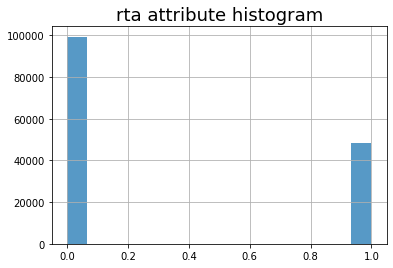

In [55]:
right['rta'].hist(
    bins=15,
    grid=True, 
    figsize=(6,4),
    alpha=0.75
    )

plt.title("rta attribute histogram", size=18)
plt.show()

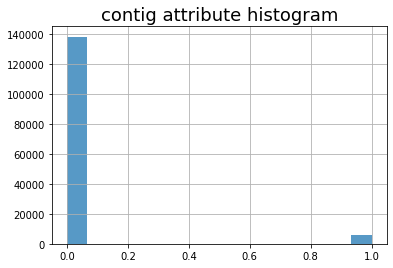

In [57]:
right['contig'].hist(
    bins=15,
    grid=True, 
    figsize=(6,4),
    alpha=0.75
    )

plt.title("contig attribute histogram", size=18)
plt.show()

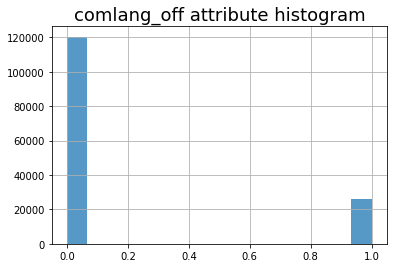

In [58]:
right['comlang_off'].hist(
    bins=15,
    grid=True, 
    figsize=(6,4),
    alpha=0.75
    )

plt.title("comlang_off attribute histogram", size=18)
plt.show()

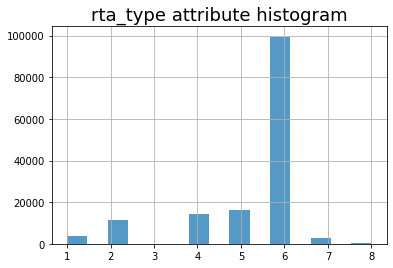

In [59]:
right['rta_type'].hist(
    bins=15,
    grid=True, 
    figsize=(6,4),
    alpha=0.75
    )

plt.title("rta_type attribute histogram", size=18)
plt.show()

In [ ]:
right['rta_type'].hist(
    bins=15,
    grid=True, 
    figsize=(6,4),
    alpha=0.75
    )

plt.title("rta_type attribute histogram", size=18)
plt.show()

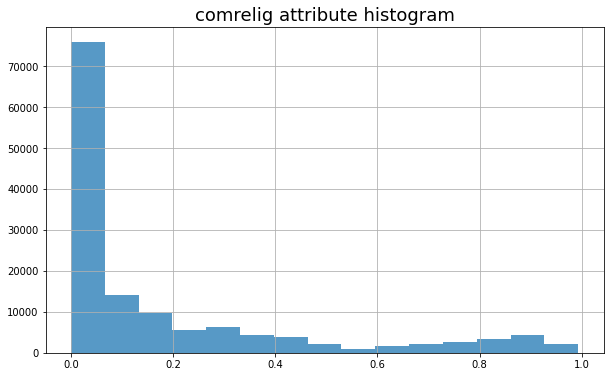

In [29]:
right['comrelig'].hist(
    bins=15,
    grid=True, 
    figsize=(10,6),
    alpha=0.75
    )

plt.title("comrelig attribute histogram", size=18)
plt.show()

### Посмотрим на данные по торговле между 2 странами

In [134]:
right[(right['iso3num_o_y'] == 4) & (right['iso3num_d_y'] == 124)]

,year,iso3_o,iso3_d,contig,dist,comlang_off,comrelig,gdp_o,gdp_d,gatt_o,...,wto_o,wto_d,eu_o,eu_d,rta,rta_coverage,rta_type,iso3num_o_y,iso3num_d_y,trade_flows
0,2007,AFG,CAN,0.0,10768.887,0.0,0.006,9.843851e+06,1.457873e+09,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,6.0,4,124,0.249
8352,2008,AFG,CAN,0.0,10768.887,0.0,0.006,1.019053e+07,1.542561e+09,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,6.0,4,124,5.146
29281,2010,AFG,CAN,0.0,10768.887,0.0,0.006,1.593678e+07,1.614072e+09,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,6.0,4,124,0.011
40512,2011,AFG,CAN,0.0,10768.887,0.0,0.006,1.787016e+07,1.778632e+09,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,6.0,4,124,0.694
51959,2012,AFG,CAN,0.0,10768.887,0.0,0.006,2.050680e+07,1.821445e+09,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,6.0,4,124,1.683
63695,2013,AFG,CAN,0.0,10768.887,0.0,0.006,2.030967e+07,1.826769e+09,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,6.0,4,124,0.462
75686,2014,AFG,CAN,0.0,10768.887,0.0,0.006,2.005019e+07,1.792883e+09,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,6.0,4,124,0.031
100425,2016,AFG,CAN,0.0,10768.887,0.0,0.006,1.946902e+07,1.529760e+09,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,6.0,4,124,0.028
112891,2017,AFG,CAN,0.0,10768.887,0.0,0.006,1.886995e+07,1.649878e+09,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,6.0,4,124,0.033
125567,2018,AFG,CAN,0.0,10768.887,0.0,0.006,1.835388e+07,1.716263e+09,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,6.0,4,124,0.020


In [135]:
right[(right['iso3num_o_y'] == 8) & (right['iso3num_d_y'] == 4)]

,year,iso3_o,iso3_d,contig,dist,comlang_off,comrelig,gdp_o,gdp_d,gatt_o,...,wto_o,wto_d,eu_o,eu_d,rta,rta_coverage,rta_type,iso3num_o_y,iso3num_d_y,trade_flows


In [136]:
right[right['iso3num_o_y'] == 8]

,year,iso3_o,iso3_d,contig,dist,comlang_off,comrelig,gdp_o,gdp_d,gatt_o,...,wto_o,wto_d,eu_o,eu_d,rta,rta_coverage,rta_type,iso3num_o_y,iso3num_d_y,trade_flows
7,2007,ALB,AUT,0.0,812.933,0.0,0.001,1.070101e+07,3.864391e+08,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,5.0,8,40,38.736
8,2007,ALB,BOL,0.0,11056.115,0.0,0.000,1.070101e+07,1.312018e+07,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,6.0,8,68,6.241
9,2007,ALB,CRI,0.0,10418.607,0.0,0.000,1.070101e+07,2.632200e+07,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,6.0,8,188,22.073
10,2007,ALB,DOM,0.0,8638.148,0.0,0.000,1.070101e+07,4.407828e+07,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,6.0,8,214,7.565
11,2007,ALB,DEU,0.0,1493.096,0.0,0.000,1.070101e+07,3.435507e+09,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,5.0,8,276,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138164,2019,ALB,SEN,0.0,4656.532,0.0,0.187,1.527918e+07,2.357808e+07,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,6.0,8,686,14.429
138165,2019,ALB,SVN,0.0,678.310,0.0,0.003,1.527918e+07,5.417423e+07,0.0,...,1.0,1.0,0.0,1.0,1.0,3.0,5.0,8,705,7.580
138166,2019,ALB,TUR,0.0,765.423,0.0,0.203,1.527918e+07,7.614255e+08,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,4.0,8,792,213.374
138167,2019,ALB,MKD,1.0,155.963,0.0,0.062,1.527918e+07,1.254704e+07,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,4.0,8,807,109.010


### Заметка
Изменяются значения всего в 3 колонках: **gdp_o**, **gdp_d** и **trade_flows**

Для примера построим линейный график GDP и торгового оборота между двумя странами

In [40]:
afg_can = right[(right['iso3num_o_y'] == 4) & (right['iso3num_d_y'] == 124)][['year','gdp_o','gdp_d','trade_flows']]

In [41]:
afg_can

,year,gdp_o,gdp_d,trade_flows
0,2007,9.843851e+06,1.457873e+09,0.249
8352,2008,1.019053e+07,1.542561e+09,5.146
29281,2010,1.593678e+07,1.614072e+09,0.011
40512,2011,1.787016e+07,1.778632e+09,0.694
51959,2012,2.050680e+07,1.821445e+09,1.683
63695,2013,2.030967e+07,1.826769e+09,0.462
75686,2014,2.005019e+07,1.792883e+09,0.031
100425,2016,1.946902e+07,1.529760e+09,0.028
112891,2017,1.886995e+07,1.649878e+09,0.033
125567,2018,1.835388e+07,1.716263e+09,0.020


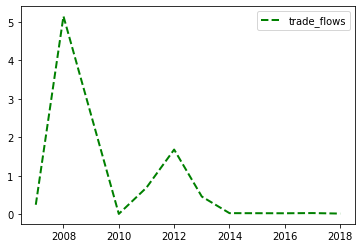

In [48]:
# multiple line plots

plt.plot( 'year', 'trade_flows', data=afg_can, marker='', color='green', linewidth=2, linestyle='dashed', label="trade_flows")

# show legend
plt.legend()

# show graph
plt.show()

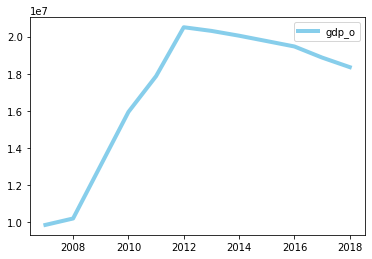

In [46]:
# multiple line plots
plt.plot( 'year', 'gdp_o', data=afg_can, marker='', markerfacecolor='red', markersize=12, color='skyblue', linewidth=4)

# show legend
plt.legend()

# show graph
plt.show()

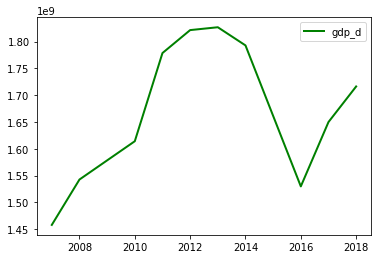

In [47]:
# multiple line plots
plt.plot( 'year', 'gdp_d', data=afg_can, marker='', color='green', linewidth=2)

# show legend
plt.legend()

# show graph
plt.show()

# Вопросы

1. Какие единицы измерения у колонок **gdp_d**, **gdp_o** и **trade_flows**?
2. Что такое 
**rta** имеют торговый контракт между 2мя странами к примеру безпошлинный ввоз,

**comlang_off** общий язык коммуникации, 

**contig** имеют ли общую границу,

**comrelig** общая религия (близость религии)

? 

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(x='year_of_release', 
            y='total_sales',
            hue='platform',
            data=top_platforms)
plt.xlabel("", size=15)
plt.ylabel("Объем продаж в млн.копий", size=15)
plt.title("Продажи игр по топ 5 платформам 1995-2016", size=18)
plt.tight_layout()

# Regression

Выбираем значимые колонки для анализа

In [71]:
right_short = right[['contig','dist','comlang_off','gdp_o','gdp_d','rta','iso3num_o_y','iso3num_d_y','trade_flows']]

Посмотрим еще раз на пропуски

In [72]:
right_short\
    .isna()\
    .sum()\
    .to_frame()\
    .assign(perc = lambda row: 100 * row[0] / right_short.shape[0])\
    .rename(columns={0: 'Кол-во пропусков', 'perc': 'Процент пропусков'})

,Кол-во пропусков,Процент пропусков
contig,6300,4.193486
dist,3709,2.468832
comlang_off,3709,2.468832
gdp_o,5873,3.909261
gdp_d,9426,6.274254
rta,2387,1.588865
iso3num_o_y,0,0.000000
iso3num_d_y,0,0.000000
trade_flows,0,0.000000


### Заметка
В общем виде доля пропусков небольшая. Для начального регрессионного анализа можно пренеберчь данными пропусками и отфильтровать записи. 

In [73]:
right_short_clean = right_short[(right_short['contig'].notnull()) & 
                                (right_short['dist'].notnull()) &
                                (right_short['comlang_off'].notnull()) &
                                (right_short['gdp_o'].notnull()) &
                                (right_short['gdp_d'].notnull()) &
                                (right_short['rta'].notnull())]

Проверяем что нет пропусков

In [74]:
right_short_clean\
    .isna()\
    .sum()\
    .to_frame()\
    .assign(perc = lambda row: 100 * row[0] / right_short_clean.shape[0])\
    .rename(columns={0: 'Кол-во пропусков', 'perc': 'Процент пропусков'})

,Кол-во пропусков,Процент пропусков
contig,0,0.0
dist,0,0.0
comlang_off,0,0.0
gdp_o,0,0.0
gdp_d,0,0.0
rta,0,0.0
iso3num_o_y,0,0.0
iso3num_d_y,0,0.0
trade_flows,0,0.0


Отдельно через фильтацию создаем датасет с пропущенными значениями. Возможно потребуется для последующего анализа

In [75]:
right_short_null = right_short[(right_short['contig'].isnull()) | 
                                (right_short['dist'].isnull()) |
                                (right_short['comlang_off'].isnull()) |
                                (right_short['gdp_o'].isnull()) |
                                (right_short['gdp_d'].isnull()) |
                                (right_short['rta'].isnull())]

Посмотрим на корреляцию призанков по коэффициенту Пирсона. Сильно коррелирующие нам в регрессии не нужны. Предварительно взглянем имеется ли нормальное распределение у количественных признаков: gdp_o, gdp_d, trade_flows

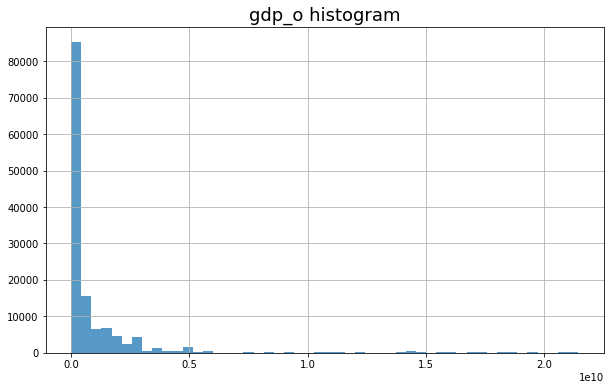

In [92]:
right_short_clean['gdp_o'].hist(
    bins=50,
    grid=True, 
    figsize=(10,6), 
    alpha=0.75
    )

plt.title("gdp_o histogram", size=18)
plt.show()

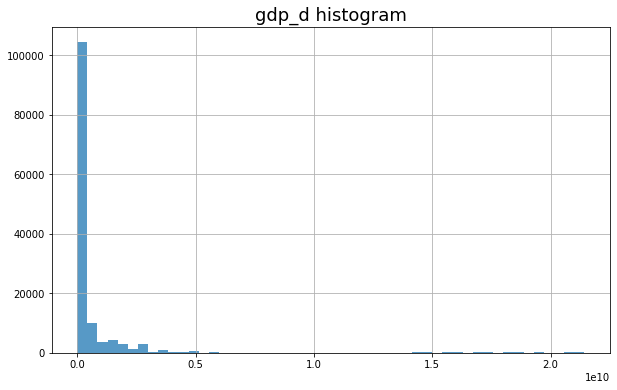

In [93]:
right_short_clean['gdp_d'].hist(
    bins=50,
    grid=True, 
    figsize=(10,6), 
    alpha=0.75
    )

plt.title("gdp_d histogram", size=18)
plt.show()

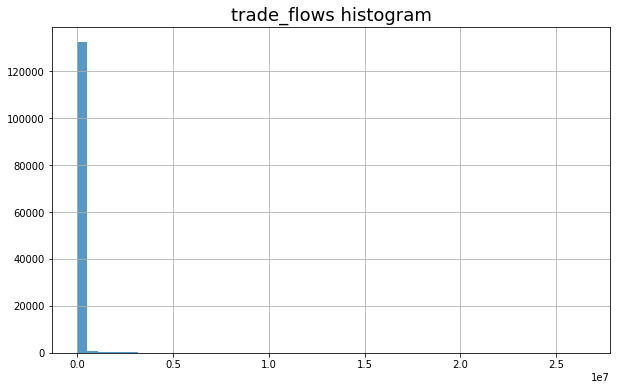

In [94]:
right_short_clean['trade_flows'].hist(
    bins=50,
    grid=True, 
    figsize=(10,6), 
    alpha=0.75
    )

plt.title("trade_flows histogram", size=18)
plt.show()

## Заметка
Данные имеют не нормальное распределение. 
Для начальной регрессии оставим как есть. 
Потенциально можно сделать преобразования: убрать выбросы, пересчитать столбцы. По ссылке ниже есть описание:

https://towardsdatascience.com/is-normal-distribution-necessary-in-regression-how-to-track-and-fix-it-494105bc50dd

### Pearson correlation

In [95]:
right_short_clean.corr(method ='pearson')

,contig,dist,comlang_off,gdp_o,gdp_d,rta,iso3num_o_y,iso3num_d_y,trade_flows
contig,1.000000,-0.249858,0.137607,-0.017224,0.002767,0.210783,0.003870,0.004138,0.104374
dist,-0.249858,1.000000,-0.100619,0.126751,0.054424,-0.414694,-0.047357,-0.026876,-0.064759
comlang_off,0.137607,-0.100619,1.000000,-0.016266,-0.001510,0.079829,0.050713,0.032444,0.027678
gdp_o,-0.017224,0.126751,-0.016266,1.000000,-0.046736,-0.098345,0.106658,-0.011930,0.115890
gdp_d,0.002767,0.054424,-0.001510,-0.046736,1.000000,-0.019916,-0.011885,0.105225,0.217203
rta,0.210783,-0.414694,0.079829,-0.098345,-0.019916,1.000000,0.000041,0.004907,0.065129
iso3num_o_y,0.003870,-0.047357,0.050713,0.106658,-0.011885,0.000041,1.000000,-0.010352,0.018010
iso3num_d_y,0.004138,-0.026876,0.032444,-0.011930,0.105225,0.004907,-0.010352,1.000000,0.021686
trade_flows,0.104374,-0.064759,0.027678,0.115890,0.217203,0.065129,0.018010,0.021686,1.000000


<AxesSubplot:>

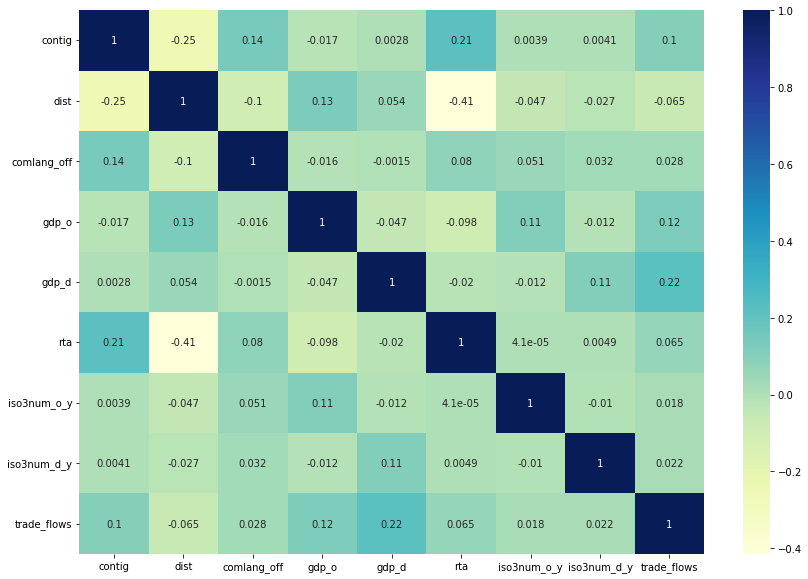

In [96]:
corr_pic = right_short_clean.corr(method ='pearson')

fig, ax = plt.subplots(figsize=(14,10)) 
sns.heatmap(corr_pic, annot=True, ax = ax,cmap="YlGnBu")

Значение корреляции интерпритируются следующим образом: 

|Значение          |Интерпретация |
|:-----------------|-------------:|
|от 0 до 0,3	   |очень слабая  |
|от 0,3 до 0,5     |слабая        |
|от 0, 5 до 0,7    |средняя       |
|от 0,7 до 0, 9    |высокая       |
|от 0,9 до 1       |очень высокая |


## Заметка
Средней и сильной корреляции не выявили. 
* по-хорошему нужно попробовать рассчитать кореляцию с коэф Спирмана.  

Далее преобразуем категориальные данные и нормализуем числовые. 

In [97]:
right_short_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134473 entries, 0 to 150232
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   contig       134473 non-null  float64
 1   dist         134473 non-null  float64
 2   comlang_off  134473 non-null  float64
 3   gdp_o        134473 non-null  float64
 4   gdp_d        134473 non-null  float64
 5   rta          134473 non-null  float64
 6   iso3num_o_y  134473 non-null  int64  
 7   iso3num_d_y  134473 non-null  int64  
 8   trade_flows  134473 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 10.3 MB


In [98]:
right_short_clean['iso3num_o_y'] = right_short_clean['iso3num_o_y'].apply(str)

/tmp/ipykernel_396696/2079539559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_short_clean['iso3num_o_y'] = right_short_clean['iso3num_o_y'].apply(str)


In [99]:
right_short_clean['iso3num_d_y'] = right_short_clean['iso3num_d_y'].apply(str)

/tmp/ipykernel_396696/1501532507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_short_clean['iso3num_d_y'] = right_short_clean['iso3num_d_y'].apply(str)


In [100]:
right_short_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134473 entries, 0 to 150232
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   contig       134473 non-null  float64
 1   dist         134473 non-null  float64
 2   comlang_off  134473 non-null  float64
 3   gdp_o        134473 non-null  float64
 4   gdp_d        134473 non-null  float64
 5   rta          134473 non-null  float64
 6   iso3num_o_y  134473 non-null  object 
 7   iso3num_d_y  134473 non-null  object 
 8   trade_flows  134473 non-null  float64
dtypes: float64(7), object(2)
memory usage: 10.3+ MB


In [101]:
right_short_clean_ml = pd.get_dummies(right_short_clean, drop_first=True)

In [102]:
right_short_clean_ml

,contig,dist,comlang_off,gdp_o,gdp_d,rta,trade_flows,iso3num_o_y_104,iso3num_o_y_108,iso3num_o_y_112,...,iso3num_d_y_842,iso3num_d_y_854,iso3num_d_y_858,iso3num_d_y_860,iso3num_d_y_862,iso3num_d_y_882,iso3num_d_y_887,iso3num_d_y_894,iso3num_d_y_90,iso3num_d_y_96
0,0.0,10768.887,0.0,9.843851e+06,1.457873e+09,0.0,0.249,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,14334.572,0.0,9.843851e+06,2.632200e+07,0.0,30.062,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,12709.283,0.0,9.843851e+06,4.407828e+07,0.0,0.001,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,5131.888,0.0,9.843851e+06,1.122676e+09,0.0,0.010,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,5361.400,0.0,9.843851e+06,8.331478e+08,0.0,9.608,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150228,0.0,1245.484,1.0,2.330977e+07,4.471599e+06,1.0,0.070,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150229,0.0,5274.503,0.0,2.330977e+07,4.211423e+08,0.0,1.964,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150230,0.0,1821.461,1.0,2.330977e+07,3.516516e+07,1.0,10.534,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150231,0.0,7947.208,1.0,2.330977e+07,2.829108e+09,0.0,0.034,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Займемся масштабированием признаков. У нас есть колонки: 'dist', 'gdp_o', 'gdp_d', 'trade_flows'. Допустим, возможен trade_flows от 0 до 100 и dist от 100 до 200000 км. Значения и их разбросыв одной колонке больше чем в другой поэтому алгоритм может автоматически решить, что этот признак важнее возраста. А это не совсем так: все признаки значимы.

Чтобы избежать этой ошибки мы масштабируем наши признаки через стандартизацию данных. В деталях для числовых признаков мы установим значения, для которых среднее, равное 0, и дисперсия, равная 1.

In [103]:
numeric = ['dist', 'gdp_o', 'gdp_d', 'trade_flows']

In [107]:
scaler = StandardScaler()
scaler.fit(right_short_clean_ml[numeric])
right_short_clean_ml[numeric] = scaler.transform(right_short_clean_ml[numeric])

In [108]:
display(right_short_clean_ml.tail(5))

,contig,dist,comlang_off,gdp_o,gdp_d,rta,trade_flows,iso3num_o_y_104,iso3num_o_y_108,iso3num_o_y_112,...,iso3num_d_y_842,iso3num_d_y_854,iso3num_d_y_858,iso3num_d_y_860,iso3num_d_y_862,iso3num_d_y_882,iso3num_d_y_887,iso3num_d_y_894,iso3num_d_y_90,iso3num_d_y_96
150228,0.0,-1.197686,1.0,-0.399913,-0.306859,1.0,-0.121291,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150229,0.0,-0.295564,0.0,-0.399913,-0.109353,0.0,-0.121286,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150230,0.0,-1.068721,1.0,-0.399913,-0.292310,1.0,-0.121264,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150231,0.0,0.302870,1.0,-0.399913,1.032043,0.0,-0.121291,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150232,0.0,1.245273,1.0,-0.399913,9.850553,0.0,-0.121291,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [109]:
features = right_short_clean_ml.drop(['trade_flows'], axis=1)
target = right_short_clean_ml['trade_flows']

In [110]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, 
    target, 
    train_size=0.75, 
    test_size=0.25, 
    random_state=12345)

In [114]:
model = LinearRegression()
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
MAE = mean_absolute_error(target_valid,predicted_valid)
RMSE = mean_squared_error(target_valid,predicted_valid)

print('model MAE: ', MAE)
print('model RMSE: ', RMSE)
print('predicted mean: ', predicted_valid.mean())

model MAE:  0.28729341280671955
model RMSE:  0.7258756343627335
predicted mean:  0.0012165522180035272


In [133]:
feature_names = [col for col in list(features.columns)]

Посмотрим на важность признаков

In [119]:
eli5.explain_weights(model,top = 50, feature_names = feature_names)

Weight?,Feature
+1.056,iso3num_o_y_276
+0.975,iso3num_d_y_56
+0.791,iso3num_o_y_372
+0.750,iso3num_o_y_757
+0.623,iso3num_o_y_842
+0.583,iso3num_d_y_276
+0.573,contig
+0.502,iso3num_d_y_757
+0.498,iso3num_o_y_251
+0.453,iso3num_o_y_56


# Regresion without ISO

В предыдущем варианте бОльшее влияние оказала кодоровка стран. предположение: видимо есть страны с очень высоким оборотом в среднем или по определенным странам имеется больше наблюдений в части международного оборота. Поэтому их iso коды имеют большей вес для модели. 

Попробуем просети регрессию по данным без iso кодов. 

In [125]:
right_short_clean_no_iso = right_short_clean[['contig','dist','comlang_off','gdp_o','gdp_d','rta','trade_flows']]

In [126]:
numeric_no_iso = ['dist', 'gdp_o', 'gdp_d', 'trade_flows']

In [127]:
scaler_no_iso = StandardScaler()
scaler_no_iso.fit(right_short_clean_no_iso[numeric_no_iso])
right_short_clean_no_iso[numeric_no_iso] = scaler_no_iso.transform(right_short_clean_no_iso[numeric_no_iso])

/home/max/Python/Angela/lib/python3.8/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [128]:
features_no_iso = right_short_clean_no_iso.drop(['trade_flows'], axis=1)
target_no_iso = right_short_clean_no_iso['trade_flows']

In [129]:
features_train_no_iso, features_valid_no_iso, target_train_no_iso, target_valid_no_iso = train_test_split(
    features_no_iso, 
    target_no_iso, 
    train_size=0.75, 
    test_size=0.25, 
    random_state=12345)

In [130]:
model_no_iso = LinearRegression()
model_no_iso.fit(features_train_no_iso, target_train_no_iso)
predicted_valid_no_iso = model_no_iso.predict(features_valid_no_iso)
MAE_no_iso = mean_absolute_error(target_valid_no_iso, predicted_valid_no_iso)
RMSE_no_iso = mean_squared_error(target_valid_no_iso, predicted_valid_no_iso)

print('model MAE_no_iso: ', MAE_no_iso)
print('model RMSE_no_iso: ', RMSE_no_iso)
print('predicted mean_no_iso: ', predicted_valid_no_iso.mean())

model MAE_no_iso:  0.21289863287554447
model RMSE_no_iso:  0.7867933925301158
predicted mean_no_iso:  0.0021043281858132007


In [131]:
feature_names_no_iso = [col for col in list(features_no_iso.columns)]
feature_names_no_iso

['contig', 'dist', 'comlang_off', 'gdp_o', 'gdp_d', 'rta']

Посмотрим на значимость признаков регрессии без iso кодов

In [132]:
eli5.explain_weights(model_no_iso,top = 50, feature_names = feature_names_no_iso)

Weight?,Feature
+0.433,contig
+0.239,gdp_d
+0.140,gdp_o
+0.089,rta
+0.023,comlang_off
-0.048,<BIAS>
-0.057,dist
